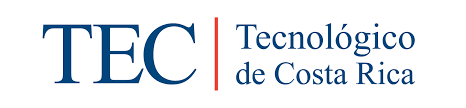

# **Maestría en Electrónica - Procesamiento Digital de Señales.**  
## **Curso:** *Reconocimiento de Patrones* <br> **Investigación Corta #2:** *Aprendizaje.*
### *Carlos Brenes Jimenez. (Id: 9002170)*

## **Definición:** Un problema es de ***Aprendizaje Supervisado***, cuando se busca automatizar o replicar un proceso existente.

### *1. Se importan las librerías necesarias de Python a utilizar.*

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### *2. Conjunto de datos seleccionado.* ***Airplane Crash Data Since 1908:*** <br> https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

### **Contexto:** <br> El conjunto de datos muestra accidentes aéreos alrededor del mundo de 1908 al 2019. <br> Incluye todos los accidentes aéreos (civiles y comerciales) resultantes en muertes.
-----
** Objetivo:** Encontrar la causa de accidentes aéreos.<br> 1) Peores aerolíneas <br>2) Peor tipo de aeronave.

### **Contenido** 
.- **Fuente de datos:** http://www.planecrashinfo.com/database.htm. 
.- **Descripción de las columnas:** 
#####     + *Date:* Fecha del accidente, en el formato - January 01, 2001.
#####     + *Time:* Hora local, en formato de 24hr.
#####     + *Airline/Op:* Aerolínea u Dueño de la aeronave.
#####     + *Flight #:* Número de vuelo asignado por el operador de la aeronave. 
#####     + *Route:* Ruta completa o parcial volada antes del accidente.
#####     + *AC Type:* Tipo de Aeronave
#####     + *Reg:* Registro ICAO de al aeronave.
#####     + *cn / ln:* Número de construcción o Número de Serie / Número de línea o fuselaje.
#####     + *Aboard:* Total de ocupantes abordo (Pasajeros / tripulación)
#####     + *Fatalities:* Total de muertes abordo (Pasajeros / tripulación)
#####     + *Ground:* Total de muertos en tierra
#####     + *Summary:* Descripción breve del accidente y causa si se conoce.



### *3. Se carga el conjunto de datos al ambiente Jupyter Lab por medio de la librería Pandas y se asignan a la variable <br> dataframe* ***(df)***

In [132]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')

### *4. Analisis Exploratorio de los datos (EDA)* 

### - *Se determina el tamaño del dataframe (Filas,Columnas)*

In [133]:
df_size = df.shape
df_size # tipo tupla

(4967, 17)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

### - *Se pueden revisar los valores inciales o finales del conjunto de datos*
##### ***Sintáxis:*** <br> ```dataframe.head(número de filas a mostrar)``` <br> ```dataframe.tail(número de filas a mostrar)```

In [135]:
df.head(5) #

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


### **Observaciones:** 
#### - Se nota la presencia de datos tipo "NaN" en varias filas y columnas del conjunto de datos. <br> - Los datos "NaN" son un problema para los algoritmos de regresión o clasificación en las etapas siguientes al pre-procesado. <br> - Los algoritmos requieren datos númericos y los "NaN" son tipo "strings".
#### Posibles estrategias a seguir: <br> 1. Eliminación de los datos "NaN" del dataset. <br> 2. Sustitución de los datos "NaN" por los valores de la media o la mediana dependiendo de la cantidad de "Outliers".

### - 5.3 Extraer información de las columnas (Etiquetas, índices y tipo de datos) presentes en el conjunto de datos
``` df_columnas = df.columns ``` , ```df_index = df.index``` y ```df.dtypes```

In [136]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

In [137]:
df.index 

RangeIndex(start=0, stop=4967, step=1)

In [138]:
df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

### - **Se modifican las etiquetas de las columnas del set de datos para una mejor manipulación**
``` df.rename(columns={ 'Old Name1': 'New Name1', 'Old Name2': 'New Name2' }, inplace=True)```

In [139]:
df.rename(columns={'Date': 'date', 'Time': 'time', 'Location': 'lcn', 'Operator': 'oper', 'Flight #': 'flt', 'Route': 'route',
                   'AC Type': 'actype', 'Registration': 'reg', 'cn/ln': 'cnln','Aboard': 'aboard', 'Aboard Passangers': 'aboardpass',
                   'Aboard Crew':'aboardcrew'}, inplace=True)
df.rename(columns={'Fatalities': 'ftot','Fatalities Passangers': 'fpass', 'Fatalities Crew': 'fcrew'}, inplace=True)
df.rename(columns={'Ground': 'gnd','Summary': 'summary'}, inplace=True)

In [140]:
df.columns

Index(['date', 'time', 'lcn', 'oper', 'flt', 'route', 'actype', 'reg', 'cnln',
       'aboard', 'aboardpass', 'aboardcrew', 'ftot', 'fpass', 'fcrew', 'gnd',
       'summary'],
      dtype='object')

### - Se determina la cantidad de datos faltantes ("NaN") en cada columna del set de datos
**Sintáxis:** 
```df.aggregate(lambda x: x.isna().sum() )```<br>
Una opción para una columna es: ```df.{etiqueta_columna}.isnull().sum()```

In [141]:
df.aggregate(lambda x: x.isna().sum() ) # Definir una Función Lambda

date             0
time          1510
lcn              4
oper            10
flt           3652
route          774
actype          15
reg            273
cnln           668
aboard          18
aboardpass     229
aboardcrew     226
ftot             8
fpass          242
fcrew          241
gnd             41
summary         64
dtype: int64

## Tabla 1 - Valores faltantes en el Conjunto de datos (4,967 x 17).

|Etiqueta de Columna:    | Cantidad de Datos Faltantes (NaN) | % Set de datos| Estrategia a seguir |
|------------------------|----------------------|---------------|----------------------------------| 
| 1. index               | 0                    |  0.0%         | n/a                              |    
| 2. date                | 0                    |  0.0%         | n/a                              |
| 3. time                | 1510                 | 30.4%         | Eliminar datos categóricos       |
| 4. location            | 4                    |  0.1%         | Eliminar datos                   |
| 5. operator            | 10                   |  0.2%         | Eliminar datos                   |
| 6. route               | 774                  | 15.6%         | Eliminar datos                   |
| 7. actype              | 15                   |  0.3%         | Eliminar datos                   |
| 8. registration        | 273                  |  5.5%         | Eliminar datos categóricos       |
| 9. cnln                | 668                  | 13.4%         | Eliminar datos categóricos       |
| 10. aboard             | 18                   |  0.4%         | Usar mediana                     |    
| 11. aboardpass         | 229                  |  4.6%         | Usar mediana                     |
| 12. aboardcrew         | 226                  |  4.5%         | Usar mediana                     |
| 13. ftot               | 8                    |  0.2%         | Usar mediana                     |
| 14. fpass              | 242                  |  4.9%         | Usar mediana                     |
| 15. fcrew              | 241                  |  4.8%         | Usar mediana                     |
| 16. gnd                | 41                   |  0.8%         | Usar mediana                     |
| 17. summary            | 64                   |  1.3%         | Eliminar datos                   |  

### - Se determina la mediana de los datos en columnas con "NaN"
**Sintáxis:** 
```df.{etiqueta_columna}.median()```

In [142]:
median_aboard = df.aboard.median()
median_aboardpass = df.aboardpass.median()
median_aboardcrew = df.aboardcrew.median()
median_ftot = df.ftot.median()
median_fpass = df.fpass.median()
median_fcrew = df.fcrew.median()
median_gnd = df.gnd.median()

### - Se sustituyen los valores "NaN" por el valor de la mediana de los datos en cada columna. Con el uso de la mediana se busca eliminar el efecto de posibles outliers.
**Sintáxis:** 
```df.{etiqueta_columna}.fillna(median_{etiqueta},inplace = True)```

In [143]:
df.aboard.fillna(median_aboard,inplace = True)
df.aboardpass.fillna(median_aboardpass,inplace = True)
df.aboardcrew.fillna(median_aboardcrew,inplace = True)
df.ftot.fillna(median_ftot,inplace = True)
df.fpass.fillna(median_fpass,inplace = True)
df.fcrew.fillna(median_fcrew,inplace = True)
df.gnd.fillna(median_gnd,inplace = True)

### - Se obtienen estadísticas descriptivas del set de datos.
**Sintáxis:** 
```df.describe(include='all').T```. Donde ".T" transpone los datos.

In [144]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4967,4539,09/11/2001,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,3457,1062,15:00,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lcn,4963,4101,"Moscow, Russia",17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oper,4957,2242,Aeroflot,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flt,1315,883,-,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,4193,3800,Training,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actype,4952,2447,Douglas DC-3,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg,4694,4661,49,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnln,4299,3869,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aboard,4967,NaN,NaN,NaN,31.0336,45.3649,0,7,16,35,644


### - **Se importa librería gráfica seaborn.**

In [145]:
import seaborn as sns

### - Se grafica la distribución de fallecimientos totales vs fallecimientos por tipo de población.

<function matplotlib.pyplot.show(*args, **kw)>

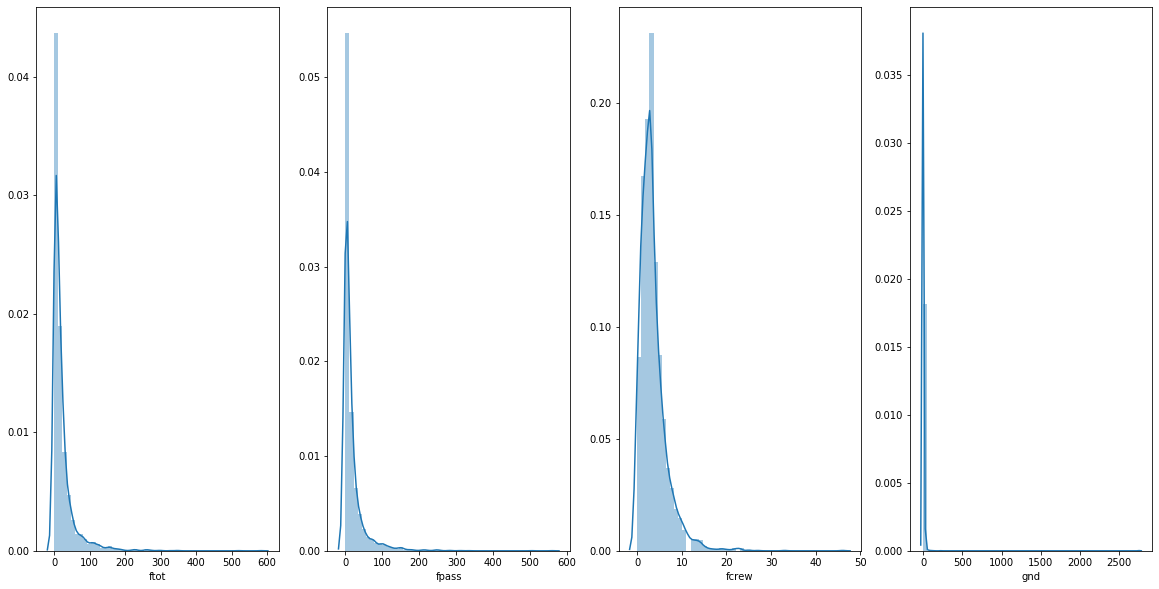

In [146]:
plt.rcParams["figure.figsize"] = (20,10)
#plt.hist(df.ftot)
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4)
sns.distplot(df.ftot, ax=ax1)
sns.distplot(df.fpass, ax=ax2)
sns.distplot(df.fcrew, ax=ax3)
sns.distplot(df.gnd, ax=ax4)
plt.show

## - **Se Eliminan datos "NaN" de las columnas del conjunto de datos** 

In [147]:
print('Tamaño Original del conjunto de datos: ', df.shape)

Tamaño Original del conjunto de datos:  (4967, 17)


In [148]:
df_drop_na = df.dropna(axis='columns', how='any')
df_drop_na.shape
# print('Tamaño del conjunto de datos al eliminar filas con datos "NaN: ', df_drop_na.shape)

(4967, 8)

### **Nota:** Se pueden re-inicializar los índices del nuevo conjunto de datos por medio de:
```dataframe.reset_index()```

In [149]:
df_drop_na.reset_index()

,index,date,aboard,aboardpass,aboardcrew,ftot,fpass,fcrew,gnd
0,0,09/17/1908,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1,09/07/1909,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,07/12/1912,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,3,08/06/1913,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,4,09/09/1913,20.0,12.0,4.0,14.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
4962,4962,04/16/2019,6.0,5.0,1.0,6.0,5.0,1.0,0.0
4963,4963,05/05/2019,13.0,11.0,2.0,13.0,11.0,2.0,0.0
4964,4964,05/05/2019,78.0,73.0,5.0,41.0,40.0,1.0,0.0
4965,4965,06/03/2019,13.0,5.0,8.0,13.0,5.0,8.0,0.0


### - Se construye la matriz ```X``` y el vector columna ```Y```. 

In [150]:
import pandas as pd
X = df_drop_na.loc[:, ['aboard','aboardpass','aboardcrew','fpass','fcrew','gnd','ftot']]
Y = df_drop_na.loc[:, ['ftot']]

In [151]:
print('X matrix (Features/Samples). Size = ', X.shape)
X.head(5)

X matrix (Features/Samples). Size =  (4967, 7)


,aboard,aboardpass,aboardcrew,fpass,fcrew,gnd,ftot
0,2.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5.0,0.0,5.0,0.0,5.0,0.0,5.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,20.0,12.0,4.0,8.0,3.0,0.0,14.0


In [152]:
print('Y column vector (Target). Size = ', Y.shape)
Y.tail(5)

Y column vector (Target). Size =  (4967, 1)


,ftot
4962,6.0
4963,13.0
4964,41.0
4965,13.0
4966,5.0


## - **Se normalizan los datos del subconjunto de datos de interés.**

In [153]:
def normalize(dataset):
    dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))*10
    return dataNorm 

In [154]:
X = normalize(X)
Y = normalize(Y)
print('X_normalized = \n', X.shape)
print('Y_normalized = \n', Y.shape)

X_normalized = 
 (4967, 7)
Y_normalized = 
 (4967, 1)


In [155]:
X.to_csv('X.csv')
Y.to_csv('Y.csv')

### - **Se obtienen estadísticas descriptivas de X y Y.**

In [156]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
aboard,4967.0,0.481889,0.704424,0.0,0.108696,0.248447,0.543478,10.0
aboardpass,4967.0,0.426902,0.701910,0.0,0.048860,0.195440,0.472313,10.0
aboardcrew,4967.0,0.730790,0.559044,0.0,0.327869,0.655738,0.819672,10.0
fpass,4967.0,0.330014,0.595673,0.0,0.017857,0.142857,0.357143,10.0
fcrew,4967.0,0.772008,0.672793,0.0,0.434783,0.652174,1.086957,10.0
gnd,4967.0,0.006232,0.201741,0.0,0.000000,0.000000,0.000000,10.0
ftot,4967.0,0.382846,0.600359,0.0,0.068611,0.188679,0.428816,10.0


In [157]:
Y.describe().T

,count,mean,std,min,25%,50%,75%,max
ftot,4967.0,0.382846,0.600359,0.0,0.068611,0.188679,0.428816,10.0


In [158]:
X.shape

(4967, 7)

## - Algoritmos de Aprendizaje de Máquina (ML)

### Algoritmo de Clasificación: K-means

### - Se importan las bibliotecas necesarias (pandas, numpy, sklearn, matplotlib)

In [159]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
#from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
np.random.seed(12)
n_samples = len(X)
data = X
#X

### Cálculo del valor óptimo de ```k```

In [160]:
ideal_k = []
for i in range(1,40):
    est_kmeans = KMeans(n_clusters=i)
    est_kmeans.fit(X)
    ideal_k.append([i,est_kmeans.inertia_])

In [161]:
ideal_k = np.array(ideal_k)

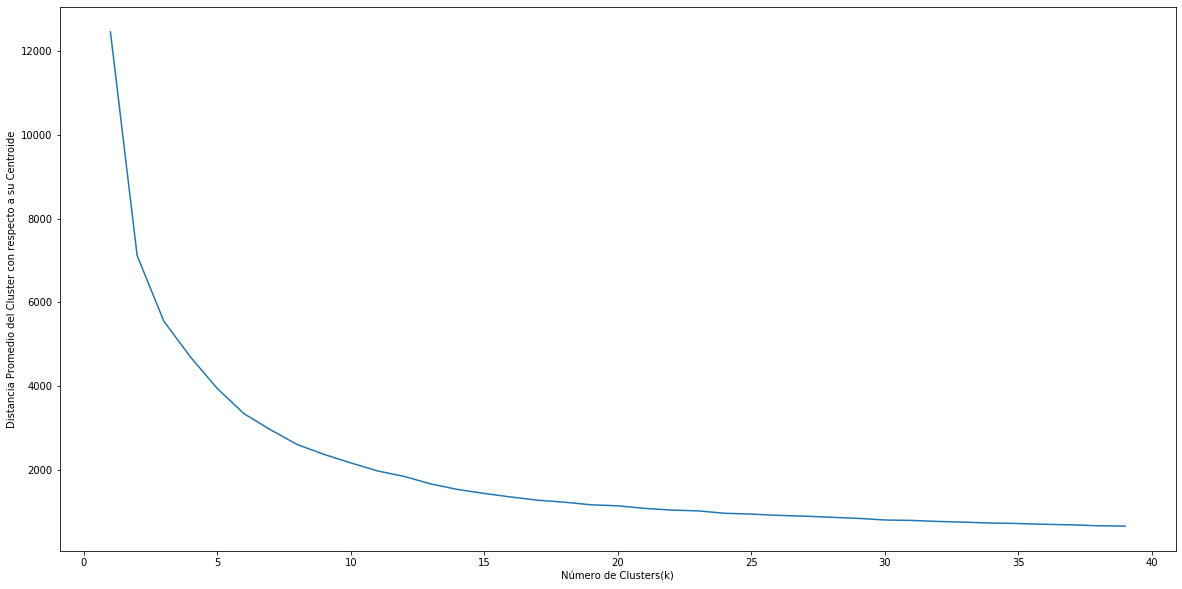

In [162]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.xlabel('Número de Clusters(k)')
plt.ylabel('Distancia Promedio del Cluster con respecto a su Centroide')
plt.show()

### - Histograma de la matrix ```X```

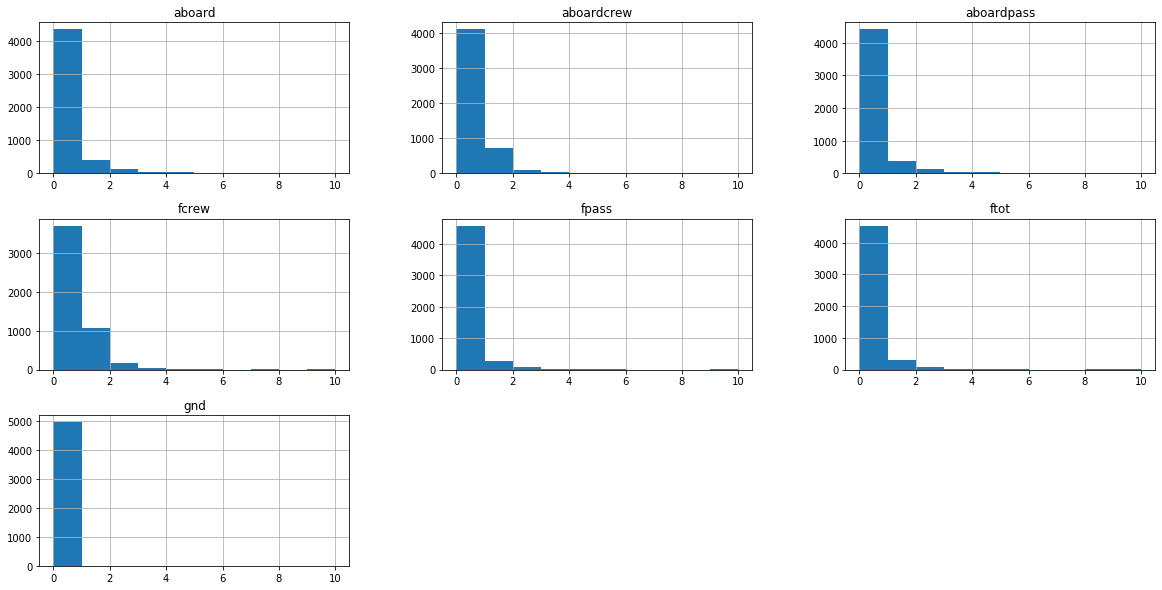

In [163]:
X.hist()
plt.show()

## Aprendizaje Supervisado. Validación y Prueba.

In [164]:
# print(X.shape,Y.shape) Tamaño de matrix X y Vector Y

### - Se importa la clase para crear el conjunto de Entrenamiento y Prueba.

In [165]:
from sklearn.model_selection import train_test_split

### - Se particionan los datos de la Matriz *```X```* y el vector *```Y```* para formar: <br> .- El Conjunto de entrenamiento *```X_train```* y *```Y_train```* (80% de los datos) <br> .- Conjunto de prueba *```X_test```* y *```Y_test```* (20% de los datos)

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(3973, 7) (994, 7) (3973, 1) (994, 1)


### - Cálculo del porcentaje de tamaño del conjunto de validación.

In [167]:
dev_size = 994/3973
dev_size

0.2501887742260257

### - Creación del conjunto de datos de Validación (25% de ```X-train``` y ```Y_train```

In [168]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size=0.25)
print(X_train.shape, X_dev.shape, Y_train.shape, Y_dev.shape)

(2979, 7) (994, 7) (2979, 1) (994, 1)


### - Proceso de *```k-fold Cross Validation```*. <br> ```k``` es el número de grupos en que el conjunto de datos será dividido. 

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [170]:
from sklearn.model_selection import KFold

In [171]:
kf = KFold(n_splits=10) # Datos se dividen en 10 partes
splits = kf.split(X) # Y se combinan entre si.

In [172]:
for train_index, test_index in splits:
    X_train, X_dev = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_dev = Y.iloc[train_index,:], X.iloc[test_index,:]

In [173]:
print(X_train.shape, X_dev.shape, Y_train.shape, Y_dev.shape)

(4471, 7) (496, 7) (4471, 1) (496, 7)


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4470, 7) (497, 7) (4470, 1) (497, 1)


## Regresion Model
## MAE (Mean Absolute Error) / RMSE (Root Mean Square Error)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4470, 7) (497, 7) (4470, 1) (497, 1)


In [176]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [177]:
# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(Y_test, Y_pred)
MAE

2.1431668952566462e-16

In [178]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
RMSE

3.7913391940356445e-16

In [179]:
# Error Analysis

In [180]:
from sklearn.model_selection import train_test_split

X_new, X_test, Y_new, Y_test = train_test_split(X,Y, test_size=0.1, random_state=101)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_new,Y_new, test_size=0.11, random_state=101)

print(X_train.shape, X_dev.shape, X_test.shape, Y_train.shape, Y_dev.shape, Y_test.shape)

(3978, 7) (492, 7) (497, 7) (3978, 1) (492, 1) (497, 1)


In [181]:
import numpy as np
np.random.seed(101)

indices_train = np.random.randint(0,len(X_train),25)
indices_dev = np.random.randint(0,len(X_dev),25)

X_train_dev = pd.concat([X_train.iloc[indices_train,:],X_dev.iloc[indices_dev,:]])
Y_train_dev = pd.concat([Y_train.iloc[indices_train,:],Y_dev.iloc[indices_dev,:]])

print(X_train_dev.shape, Y_train_dev.shape)


(50, 7) (50, 1)


## Naive Bayes Algorithm

In [182]:
import pandas as pd
# Se carga este set de datos para el calculo comparativo de desempeño de los algoritmos
data = pd.read_csv("fertility_Diagnosis.txt", header=None) 


In [183]:
X = data.iloc[:,:9]
Y = data.iloc[:,9]

In [184]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
pred_NB = model_NB.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print('Predicción del Algoritmo Naive-Bayes: ',pred_NB)

Predicción del Algoritmo Naive-Bayes:  ['N']


## Decision Tree

In [186]:
import pandas as pd
data = pd.read_csv("fertility_Diagnosis.txt", header=None) # Tuve que utilizar este set de datos porque no funciono con el anterior.
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
pred_tree = model_tree.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print('Predicción del Algoritmo Decision Tree: ', pred_tree)

Predicción del Algoritmo Decision Tree:  ['N']


## SVM

In [188]:
import pandas as pd
data = pd.read_csv("fertility_Diagnosis.txt", header=None) # Tuve que utilizar este set de datos porque no funciono con el anterior.
from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
model_svm.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [189]:
pred_svm = model_svm.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print('Predicción del Algoritmo Decision Tree: ', pred_svm)

Predicción del Algoritmo Decision Tree:  ['N']


## Comparación de Algoritmos de Machine Learning

### Lineal Discriminant Analysis:
##### Es un clasificador con un frontera de decisión lineal, generado al ajustar densidades condicionales de la clase a los datos y usando la regla de Bayes. El modelo ajusta una densidad Gaussiana a cada clase, y asume que todas las clases comparten la misma matrix de covarianza. El modelo de ajuste puede usarse tambien para reducir las dimensiones de la entrada al proyectarla a las direcciones mas discriminativas, al usar el método de ```transform```.

### AdaBoost:
##### Los párametros más importantes son ```base_estimator```, ```n_estimators```, y ```learning_rate```.
##### - ```base_estimator``` es el algoritmo de aprendizaje que se usa para entrenar los modelos débiles. Este parámetro casi nunca se cambia porque utiliza comúnmente el ```decision tree```. Este es el párametro por defecto.
##### - ```n_estimators``` es el número de modelos a entrenar iterativamente.
##### - ```learning_rate``` es la contribución de cada modelo a los ```pesos (weights)``` y su valor por defecto es 1. Reduciendo el ```learning rate``` significa que los pesos se incrementarán <br> or reducirán en un grado menor, forzando al modelo de entrenamiento a ser más lento (pero a veces resulta en mejor desempeño.
##### ```loss``` es exclusivo a AdaBoostRegressor y configura el uso de la función de pérdida a cuando se actualizan los pesos. El valor por defecto es una función de pérdida lineal que puede cambiarse a cuadrada o exponencial.
##### **Pros:** AdaBoost es de fácil implementación. Iterativamente corrige los errores del clasificador más débil y mejora el ```accuracy``` al combinar aprendizes débiles. <br> Se pueden usar muchos clasificadores con AdaBoost. AdaBoost is not tiende a ```overfitting```. 
##### **Cons:** AdaBoost es sensitivo a datos ruidosos. <br> - Es altamento afectado por "outliers" ya que trata de ajustar a cada punto perfectamente. <br> AdaBoost es más lento comparado a XGBoost.

### Carga de bibliotecas

In [190]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### - Carga del dataset

In [191]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

### - Preparar configuración para el banco de prueba del Cross Validation

In [192]:
seed = 12

### - Preparación de modelos.

In [193]:
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=163))) # Condición máxima de iteraciones para asegurar convergencia del algoritmo.
models.append(('Lineal Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive-Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Ada Boost', AdaBoostClassifier())) # AdaBoost uses Decision Tree Classifier as default Classifier.

### - Evaluación de cada uno de los modelos por separado.

In [194]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: Mean(%f) StdDev(%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Logistic Regression: Mean(0.770745) StdDev(0.042500)
Lineal Discriminant Analysis: Mean(0.766849) StdDev(0.046694)
KNN: Mean(0.705656) StdDev(0.045670)
Decision Tree: Mean(0.677119) StdDev(0.036308)
Naive-Bayes: Mean(0.752512) StdDev(0.043712)
SVM: Mean(0.757741) StdDev(0.043981)
Ada Boost: Mean(0.760355) StdDev(0.038580)


## - Comparación del "Accuracy" al aplicar siete algoritmos de Aprendizaje Supervisado a un conjunto de datos.

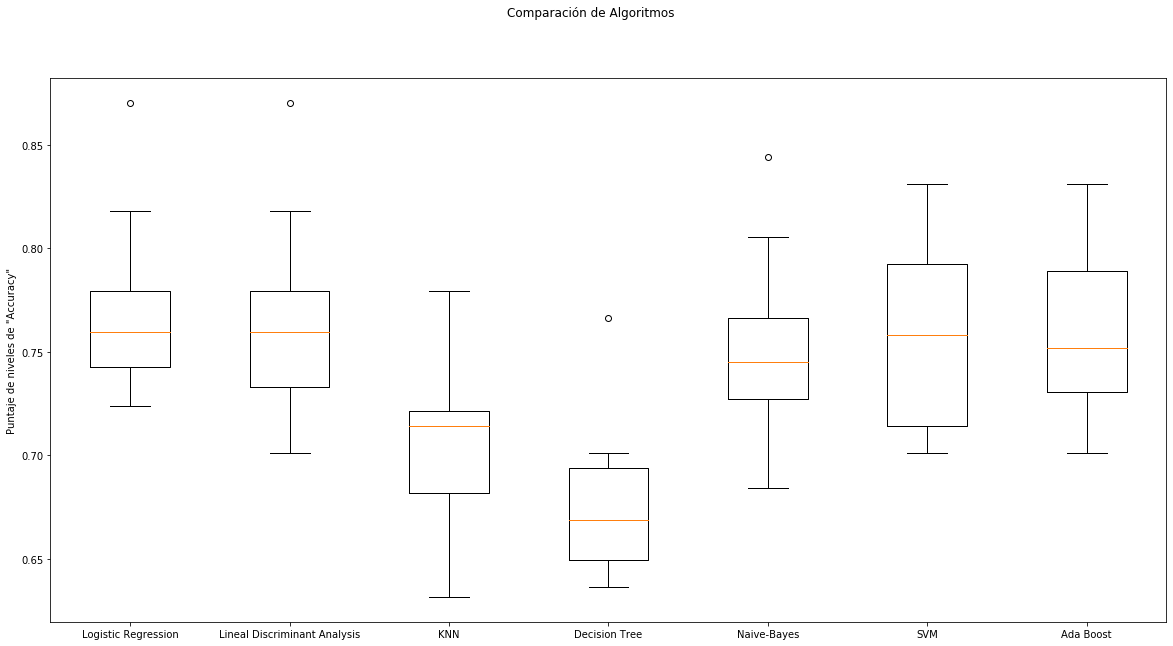

In [195]:
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Puntaje de niveles de \"Accuracy\"')
plt.show()

## Conclusiones: <br>
### 1. Con base a los niveles de "Accuracy" se identifican como potenciales candidatos de modelo a usar en el problema de clasificación: <br> - Linear Regression <br> - Lineal Discriminant Analysis <br> - SVM
### 2. El algoritmo de Logistic regression, no requiere mucho recurso computacional, es fácil de interpretar, las entradas (features) no necesitan ser escaladas, no se requiere ajustes, es fácil de regularizar y su salida es predecida probabilísticamente. Una desventaja importante es que no puede resolver problemas no-lineales ya que su proceso de decision es lineal. 
### 3. El algoritmo de Análisis de discriminante lineal se fundamenta en el ajuste de las densidades condicionales de la clase de datos y usa la regla de Bayes. La clasificación que realiza es rápida y de fácil implementación. Las desventajas que tiene es de asumir comportamiento gaussiano, tiempo de entrenamiento y operaciones de matrices complicadas.
### 4. El algoritmo SVM tiene como ventajas que trabaja muy bien cuando hay un margen claro de de separación, es efectivo en espacios dimensionales grandes (número de dimensiones > al número de muestras), utiliza un subconjunto de puntos de entrenamiento en la función de decisión y es eficiente en el uso de memoria. En cuanto a desventajas no funciona muy bien con conjuntos de datos muy grandes así como cuando los datos son ruidosos. Este algoritmo no da estimados probabilísticos (estos se calculan por medio de 5 grupos de cross-validation.

## **Referencias:**
### - A.Boschetti, L.Massaron, 2018. "Python Data Science Essentials". Recuperado de: https://learning.oreilly.com/videos/python-data-science/9781789538526
### - A.Navlani, 2018. "AdaBoost Classifier in Python". Recurperado de: https://www.datacamp.com/community/tutorials/adaboost-classifier-python
### - B.Bateman et al., 2020. "The Supervised Learning Workshop - Second Edition", Recuperado de: https://learning.oreilly.com/library/view/the-supervised-learning/9781800209046/
### - C.Albon, 2017. "Adaboost Classifier", Recuperado de: https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/
### - G.Bonaccorso, 2018. "Fundamentals of Machine Learning with scikit-learn", Recuperado de: https://learning.oreilly.com/videos/fundamentals-of-machine/9781789134377
### - J. Brownleeh, 2019. "How To Compare Machine Learning Algorithms in Python with scikit-learn". Recuperado de: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
### - S.Guido; A.Müller, 2016. "Introduction to Machine Learning with Python". Recuperado de: https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch01.html
### - Scikit-learn, 2020. "scikit-learn. Machine Learning in Python", Recuperado de: https://scikit-learn.org/stable/index.html
### - S.Banerjee et al., 2019. "Python and Machine Learning Foundation", Recuperado de: https://learning.oreilly.com/learning-paths/learning-path-python/9781838821111/
### - S.Raschka et al., 2019. "Python Machine Learning - Third Edition", Recuperado de: https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/

## ** ***ULTIMA LINEA*** **